

Model:                            OLS

Method:                 Least Squares  

Date:                Sun, 20 Mar 2022   

Time:                        20:24 

# 作业1

## 1.数据预处理

### 1.1读取并浏览数据

In [81]:
#导入库
import pandas as pd

In [82]:
#读取数据
path=r'D:\Ugorgeous\LLLLearning\ItDS\linear regression\MLR\Auto.csv'
data=pd.read_csv(path)

In [83]:
#查看数据组成情况
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [84]:
#查看数据描述性统计
data.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1.2缺失值处理

In [85]:
#发现缺少'horsepower'列，判断其很可能为object类型。因此查看数据类型
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [86]:
#尝试将'horsepower'列转化为int64
data['horsepower']=data['horsepower'].astype('float')

ValueError: could not convert string to float: '?'

In [ ]:
#报错原因：有缺失值且被记为'?'
#查找值为'?'的数据条数，以决定以何种方式处理缺失值。
data[data['horsepower']=='?']

In [ ]:
#共有5条数据的'horsepower'特征存在缺失值，占总数据量的比例很少，故对存在缺失值的数据进行删除处理。
data=data.drop([32,126,330,336,354])

In [ ]:
#尝试将'horsepower'列转化为int64
data['horsepower']=data['horsepower'].astype('float')
#结果未见异常

In [ ]:
#查看是否存在缺失值
data[data.isnull().any(axis=1)]
#(无缺失值)

## 2.完成作业2内容

### 2.1绘制散点图矩阵

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(data)

### 2.2 计算相关系数矩阵

In [ ]:
#除去'name'列
cal_data=data.drop('name',axis=1)
cal_data

In [87]:
#计算相关系数矩阵
cal_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### 2.3进行多元线性回归

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
X = cal_data.drop('mpg',axis=1)
 
y = cal_data['mpg']

#划分测试集和训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1)

#训练
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

**结果汇总：**

In [88]:
#参数
print ('Intercept:\n',regr.intercept_)
print ('Coefficents:\n',regr.coef_)

#RSE
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

#explained_variance_score
#(期望方差,越接近1代表预测值与真实值越接近)
print('Variance score: %.2f' % regr.score(X_test,y_test))

Intercept:
 -17.542856764332573
Coefficents:
 [-0.43000526  0.01949531 -0.01682913 -0.00650828  0.07944822  0.75297175
  1.37806177]
Residual sum of squares: 11.61
Variance score: 0.83


### 2.4 结果分析

#### (a)

由散点图矩阵、相关系数矩阵和多元线性回归的结果，可轻松得出预测变量与响应变量存在一定关系。

#### (b)

由相关系数矩阵可知，预测变量 'cylinders', 'displacement', 'horsepower', 'weight'与响应变量'mpg'均有在统计意义上的较强的关系，
其中'weight'与'mpg'的关系最为显著。

#### (c)

在线性回归结果中，特征'year'对应的系数为0.75297175，即'year'与'mpg'成一定程度的正相关关系。

### 2.5绘制线性回归拟合结果图并分析

In [106]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

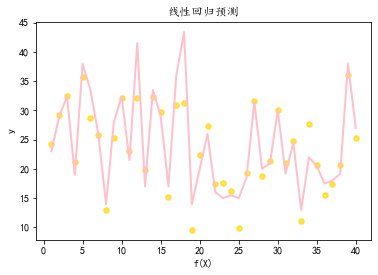

In [160]:
y_predict=regr.predict(X_test)
#绘图
plt.figure()
plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.title(u"多元线性回归预测")
plt.xlabel(u"f(X)")
plt.ylabel(u"y")
plt.scatter(np.arange(1,len(X_test)+1),y_predict, marker="o",color="gold", s=30,alpha=0.7)
plt.plot(np.arange(1,len(X_test)+1), y_test, linewidth=2, color="pink")
plt.show()

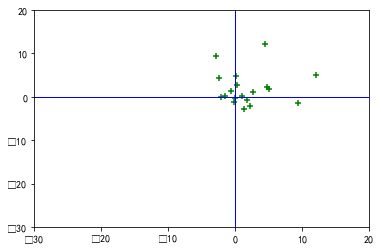

In [162]:
#残差诊断法
et = y_test-y_predict    #残差
et = list(et)

#残差et 与 et_1 散点图
plt.ylim(-30, 20)
plt.xlim(-30, 20)
plt.plot([-30,20],[0,0],'b',linewidth=1)
plt.plot([0,0],[-30,20],'b',linewidth=1)
et_1 = et[1:20]
et_change = et[0:19]
plt.scatter(et_1,et_change,marker = '+',color = 'g')

由测试集的预测值-真实值拟合图和残差图可知，测试集中绝大部分数据拟合效果较好且无显著离群点。

这代表模型**泛化能力较好**。

### 2.6变换预测变量进行回归分析

#### 2.6.1 log(x)

In [118]:
log_X = X.apply(np.log)
 
y = cal_data['mpg']

#划分测试集和训练集
X_train, X_test, y_train, y_test = train_test_split(log_X, y, test_size=0.1,random_state=1)

#训练
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#参数
print ('Intercept:\n',regr.intercept_)
print ('Coefficents:\n',regr.coef_)

#RSE
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

#explained_variance_score
#(期望方差,越接近1代表预测值与真实值越接近)
print('Variance score: %.2f' % regr.score(X_test,y_test))

Intercept:
 -68.5784055176596
Coefficents:
 [  1.27595537  -0.45766435  -6.14120959 -13.83943558  -4.04714135
  55.66642981   1.57564495]
Residual sum of squares: 9.31
Variance score: 0.86


#### 2.6.2 $X^2$

In [119]:
X_squared = X**2
 
y = cal_data['mpg']

#划分测试集和训练集
X_train, X_test, y_train, y_test = train_test_split(X_squared, y, test_size=0.1,random_state=1)

#训练
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#参数
print ('Intercept:\n',regr.intercept_)
print ('Coefficents:\n',regr.coef_)

#RSE
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

#explained_variance_score
#(期望方差,越接近1代表预测值与真实值越接近)
print('Variance score: %.2f' % regr.score(X_test,y_test))

Intercept:
 1.405335135195127
Coefficents:
 [-8.43922916e-02  5.54477570e-05 -4.02211833e-05 -9.27183523e-07
  5.73291444e-03  4.96779443e-03  4.02938228e-01]
Residual sum of squares: 12.20
Variance score: 0.82


#### 2.6.3 $\sqrt{x}$

In [120]:
X_sqrt = X**0.5
 
y = cal_data['mpg']

#划分测试集和训练集
X_train, X_test, y_train, y_test = train_test_split(X_sqrt, y, test_size=0.1,random_state=1)

#训练
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#参数
print ('Intercept:\n',regr.intercept_)
print ('Coefficents:\n',regr.coef_)

#RSE
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

#explained_variance_score
#(期望方差,越接近1代表预测值与真实值越接近)
print('Variance score: %.2f' % regr.score(X_test,y_test))

Intercept:
 -51.7418923152113
Coefficents:
 [-0.13493603  0.25294979 -0.71001968 -0.64281551 -0.6108751  12.90364974
  3.15338902]
Residual sum of squares: 10.88
Variance score: 0.84


#### 2.6.4 小结

通过对预测变量进行变换进行回归，可得出：经以上三种变换后，模型的拟合效果均较好且相差不大，期望方差都在0.82~0.86之间；

其中**log(x)**的拟合效果最好，期望方差为0.86。

# 作业2

命题：如果X的列向量线性无关，则$X^T$X是一个可逆的方阵。

证明：

假设A是一个k*n的矩阵，那么$X^T$X是一个n*n的方阵；

要证明这个方阵可逆，只要证明N($X^T$X) = 零空间即可。

假设列向量向量V，满足 ($X^T$X) V = 0 

=>  $V^T$*$X^T$*XV=0

=>  $(XV)^T$(XV)=0

=>   XV=0   则X的零空间只包含零向量

=>   V = 0

证毕

 （参考链接：[A转置乘以A可逆](https://blog.csdn.net/gutsyfarmer/article/details/104166797?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522164777938816782246427059%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=164777938816782246427059&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-104166797.142^v2^pc_search_result_control_group,143^v4^control&utm_term=x%E7%9A%84%E8%BD%AC%E7%BD%AE%E4%B9%98x%E5%8F%AF%E9%80%86&spm=1018.2226.3001.4187)）

- **以下为草稿**

以下尝试了几种方法显示图片，都失败了

In [121]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload-images.jianshu.io/upload_images/27642441-45384a31512d3082.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240")

In [122]:
%%html
<img src="VOCdevkit/VOC2007_dest/JPEGImages/000012.jpg",width=400,height=200>

In [ ]:
#测试集预测值
print('Predicted results:\n',regr.predict(X_test))

一个做用户界面的方法，待学习

In [ ]:
# with statsmodels
X = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)